# Support Vector Machines (SVM)

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing dataset

In [4]:
df = pd.read_excel('Instagram_Ads_SVM.xlsx')
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
df.head()

,Age,Mobile Phone,Purchased
0,15,6334,0
1,28,6667,0
2,20,14334,0
3,21,19000,0
4,15,25334,0


In [5]:
print(X)
print(Y)

[[   15  6334]
 [   28  6667]
 [   20 14334]
 [   21 19000]
 [   15 25334]
 [   21 19334]
 [   21 28000]
 [   25 50000]
 [   20 11000]
 [   28 21667]
 [   20 26667]
 [   26 17000]
 [   28 36000]
 [   18  6667]
 [   20 26334]
 [   21 18000]
 [   24 45000]
 [   24 29667]
 [   19 10667]
 [   14 14667]
 [   23 27667]
 [   28  7667]
 [   21 19334]
 [   19 18334]
 [   18 16000]
 [   22 26334]
 [   17  6000]
 [   25 39000]
 [   21  6667]
 [   20 29000]
 [   18 22000]
 [   25 40000]
 [   17 21000]
 [   24 22667]
 [   20 26667]
 [   19  9000]
 [   16  7667]
 [   26 37667]
 [   25  6000]
 [   27 37334]
 [   24 38667]
 [   20  5000]
 [   23  9334]
 [   23 27667]
 [   26 49667]
 [   15  7000]
 [   16 24000]
 [   20 11667]
 [   21 29667]
 [   20 28667]
 [   30 26667]
 [   31 23667]
 [   29 23667]
 [   20 30000]
 [   29 11000]
 [   17 18334]
 [   28 23667]
 [   23 49334]
 [   23 15667]
 [   16 29334]
 [   27 38334]
 [   20 39334]
 [   27 14334]
 [   27 24000]
 [   18  9334]
 [   28 15667]
 [   20  7

## Splitting the dataset into Training & Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

## SVM Training on Training set

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state=0)
classifier.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

## Predicting

In [10]:
print(classifier.predict(sc.transform([[32, 45000]])))

[1]


## Predicting Test set results

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


## Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(Y_test,y_pred))

[[23  2]
 [ 3 12]]


In [17]:
accuracy_score(Y_test,y_pred)

0.875

## Visualizing Test Set results

/var/folders/hy/w9rnt0zs6ll1g70czymsybv40000gn/T/ipykernel_1633/700138970.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


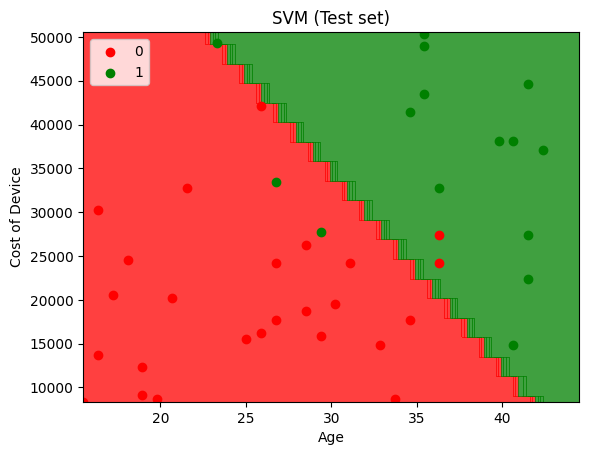

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Cost of Device')
plt.legend()
plt.show()

## Visualising Training set results

/var/folders/hy/w9rnt0zs6ll1g70czymsybv40000gn/T/ipykernel_1633/3955336438.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


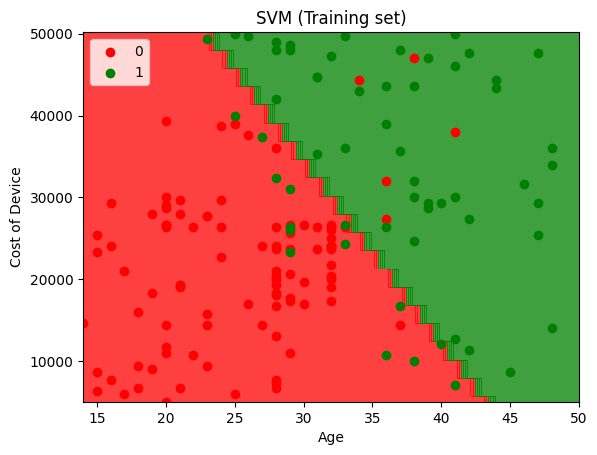

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Cost of Device')
plt.legend()
plt.show()